In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [2]:
#workpath = "C:/"
#os.getcwd()
#os.chdir(workpath)
#files = os.listdir(workpath)
#print(files)

In [3]:
def logistica(x):
    return r*x*(1-x);

def fn(x0,f,n):
    x = x0
    for j in range(n):
        x = f(x)
    return x


def orbita(x0,f,N):
    orb = np.empty([N])
    for i in range(N):
        orb[i] = fn(x0, f, i)
    return orb

#Posible periodo de una subórbita dado un epsilon.
def periodo(suborb, epsilon):
    N=len(suborb)
    #Si no encuentra un periodo menor que el tamaño de la subórbita, devolveremos -1
    per = -1
    for i in np.arange(2,N-1,1):
        if abs(suborb[N-1] - suborb[N-i]) < epsilon :
            per = i-1
            break
    return per

#Función para calcular un conjunto atractor
def atrac(x0, f, N0, N, epsilon):
    orb = orbita(x0,f,N0)
    ult = orb[-1*np.arange(N,0,-1)]
    per = periodo(ult, epsilon)
    V0 = np.sort([ult[N-1-i] for i in range(per)])
    return V0, per

#Función para calcular el posible error cometido
def error(V0, periodo) :
    errores = []   
    V_n = V0.copy()
    for i in range(12):
        V_next = fn(V_n, logistica, periodo)
        errores.append(max(abs(V_next-V0)))
        V_n = V_next
        
    #Ordenamos y devolvemos el último
    errores.sort()
    return errores[11]

#Comprobar la estabilidad para el x0 inicial
def estabilidad(V0, x0, N0, N, epsilon):
    #Variamos ligeramente x0
    for x0_next in np.arange(x0, x0 + delta_x0, delta_x0):
        V0_next, _ = atrac(x0_next, logistica, N0, N, epsilon)    
        V0.sort()
        #Si los valores están demasiado lejanos de los originales, descartamos
        if max(abs(V0_next-V0)) > epsilon:
            return False
    return True

In [4]:
#Valores iniciales
x0 = 0.2
r = 3.1
eps = 0.0001
delta_x0 = 0.002

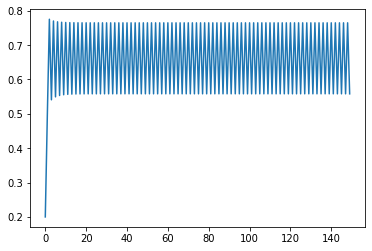

In [5]:
#Primero vamos a ver la órbita
N = 150
orb = orbita(x0,logistica,N)
plt.plot(orb)
plt.show()

In [6]:
#Conjunto atractor para N = 50 y N0 = 200
V0, per = atrac(x0, logistica, 200, 50, eps)
print("Para los valores de r = " + str(r) + " y de x0 = " + str(x0) + ":")
print("El conjunto atractor es " + str(V0) + ", con un periodo de " + str(per) + " y un error de " + str(error(V0,per)))
if estabilidad(V0, x0, 200, 50, eps):
    print("Es estable.")
else:
    print("No es estable.")

Para los valores de r = 3.1 y de x0 = 0.2:
El conjunto atractor es [0.55801413 0.76456652], con un periodo de 2 y un error de 0.0
Es estable.


In [7]:
#Otros valores iniciales
x0 = 0.6
r = 3.48
eps = 0.0001
delta_x0 = 0.02

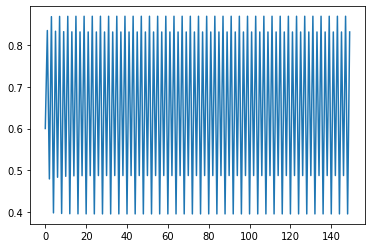

In [8]:
#Vemos la órbita
N = 150
orb = orbita(x0,logistica,N)
plt.plot(orb)
plt.show()

In [9]:
#Conjunto atractor para N = 50 y N0 = 200
V0, per = atrac(x0, logistica, 200, 50, eps)
print("Para los valores de r = " + str(r) + " y de x0 = " + str(x0) + ":")
print("El conjunto atractor es " + str(V0) + ", con un periodo de " + str(per) + " y un error de " + str(error(V0,per)))
if estabilidad(V0, x0, 200, 50, eps):
    print("Es estable.")
else:
    print("No es estable.")

Para los valores de r = 3.48 y de x0 = 0.6:
El conjunto atractor es [0.3950645  0.48715928 0.83168012 0.8694262 ], con un periodo de 4 y un error de 7.771561172376096e-16
Es estable.


In [18]:
#Ahora vamos a buscar un conjunto atractor de 8 elementos
#Vamos buscando un r poco a poco hasta encontrar el primero que lo satisfaga

#Fijamos un x0
x0 = 0.2
rss = np.arange(3.544,4, 0.0005)
for i in range(len(rss)):
    r = rss[i]
    V0, per = atrac(x0, logistica, 200, 50, eps)
    if per == 8: 
        print("Un conjunto atractor de 8 elementos es " + str(V0) + ", para un valor de r = " + str(r))
        #Una vez econtramos uno, paramos
        break

#Vamos a buscar aproximadamente el intervvalo de valores de r en los que el conjunto atractor tiene 8 elementos
#Puesto que según aumenta el valor de r, también va aumentando el número de elementos del conjunto atractor, podemos
#emplear una búsqueda binaria para tratar de delimitar el intervalo.
a1 = 3.544  # Extremo izquierdo del intervalo a la izquierda de nuestra r
b1 = r  # Extremo derecho del intervalo a la izquierda de nuestra r
a2 = r  # Extremo izquierdo del intervalo a la derecha de nuestra r
b2 = 4  # Extremo derecho del intervalo a la derecha de nuestra r

#Probamos iterando 20 veces para hacer más pequeño el intervalo final y así minimizar el error
for i in range(20):
    r1 = (a1 + b1)/2
    r = r1
    V01, per1 = atrac(x0, logistica, 200, 50, eps)
    r2 = (a2 + b2)/2
    r = r2
    V02, per2 = atrac(x0, logistica, 200, 50, eps)
    if per1 < 8:
        a1 = r1
    else:
        b1 = r1
    if per2 > 8 or per2 == -1: 
        b2 = r2
    else:
        a2 = r2
    # Devolvemos el intervalo final
print("Para r en ",
    [b1, a2], " el conjunto atractor tiene 8 elementos.")

Un conjunto atractor de 8 elementos es [0.36175989 0.36500359 0.51981889 0.52700095 0.818273   0.82144088
 0.88341624 0.88460796], para un valor de r = 3.544
Para r en  [3.544, 3.5630936431884765]  el conjunto atractor tiene 8 elementos.
